In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
boston_data = pd.read_csv("../data/boston_housing.csv")

In [3]:
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Statisstical info
boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Data-Type information
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [47]:
# Check for duplicate values
boston_data.duplicated().sum()

np.int64(0)

## Preprocessing

In [ ]:
# Checking Missing Values in the data
boston_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

# Exploratory Data Analysis using

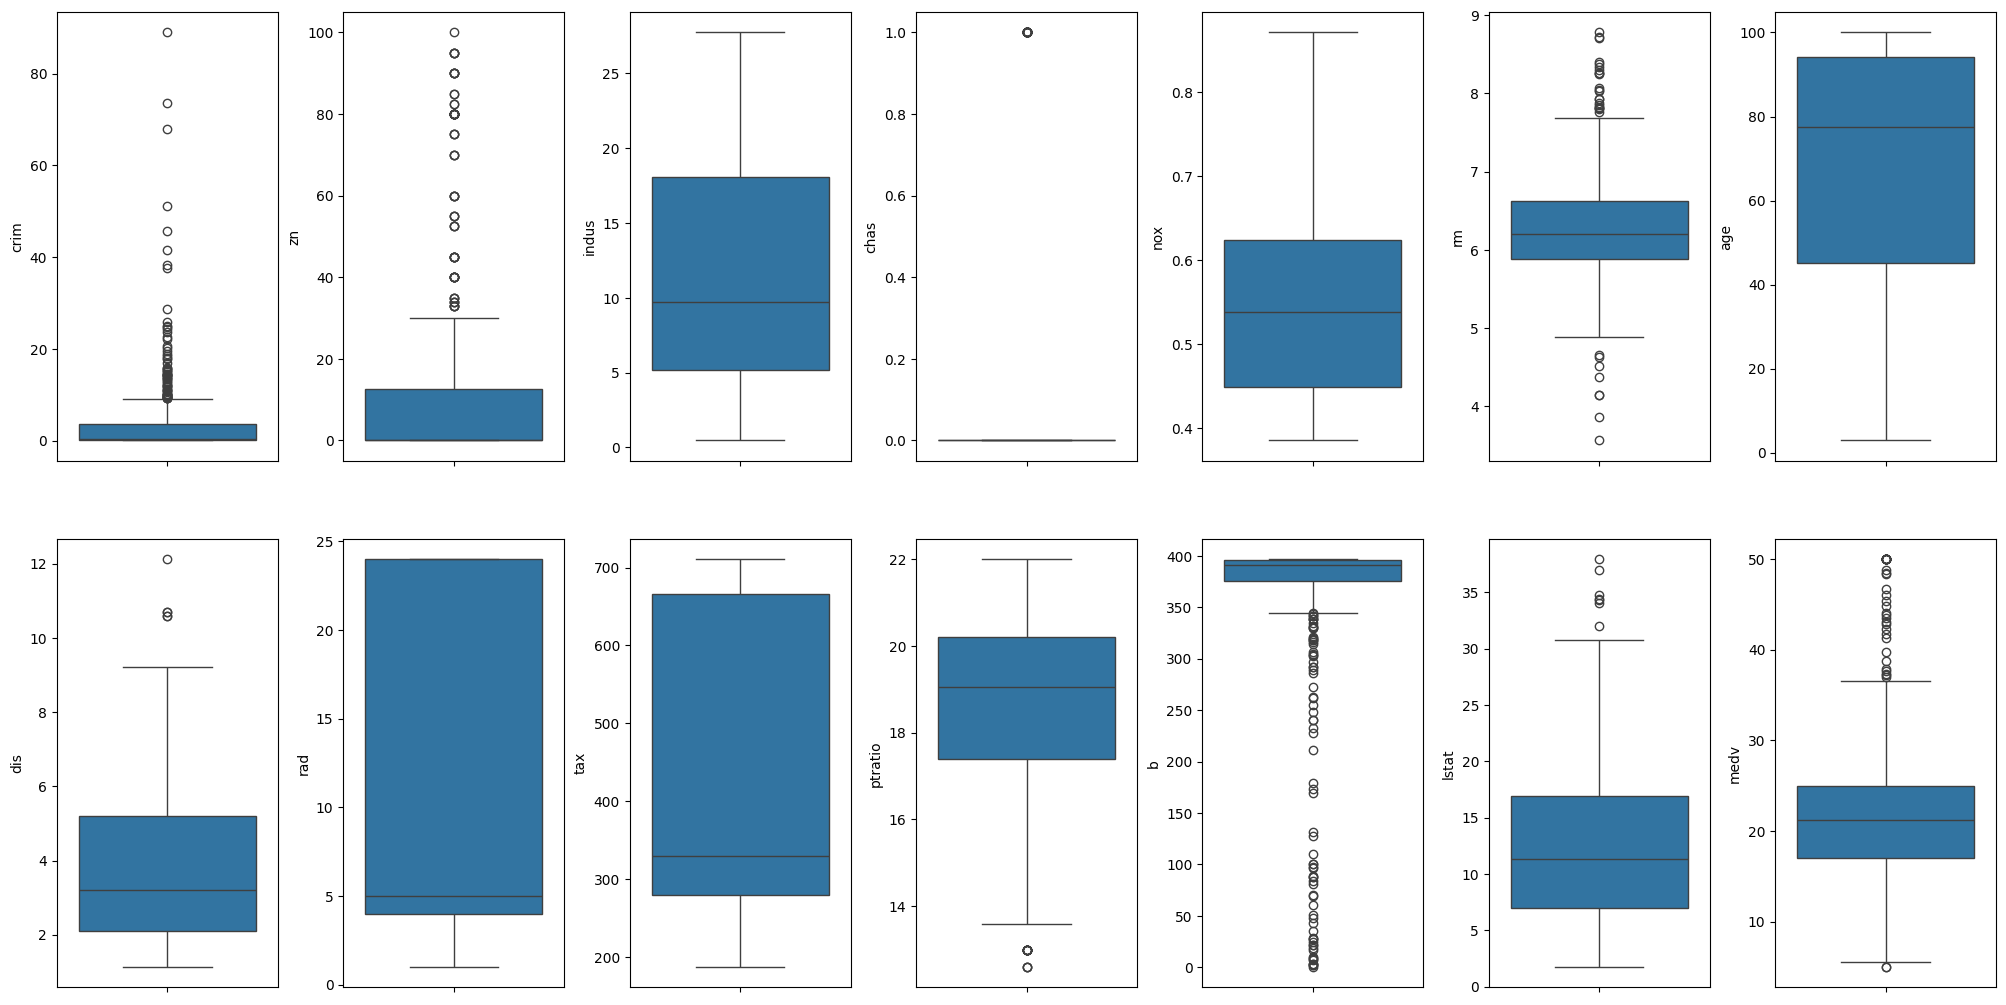

In [11]:
# Create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in boston_data.items():
    sns.boxplot(y=col, data=boston_data, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

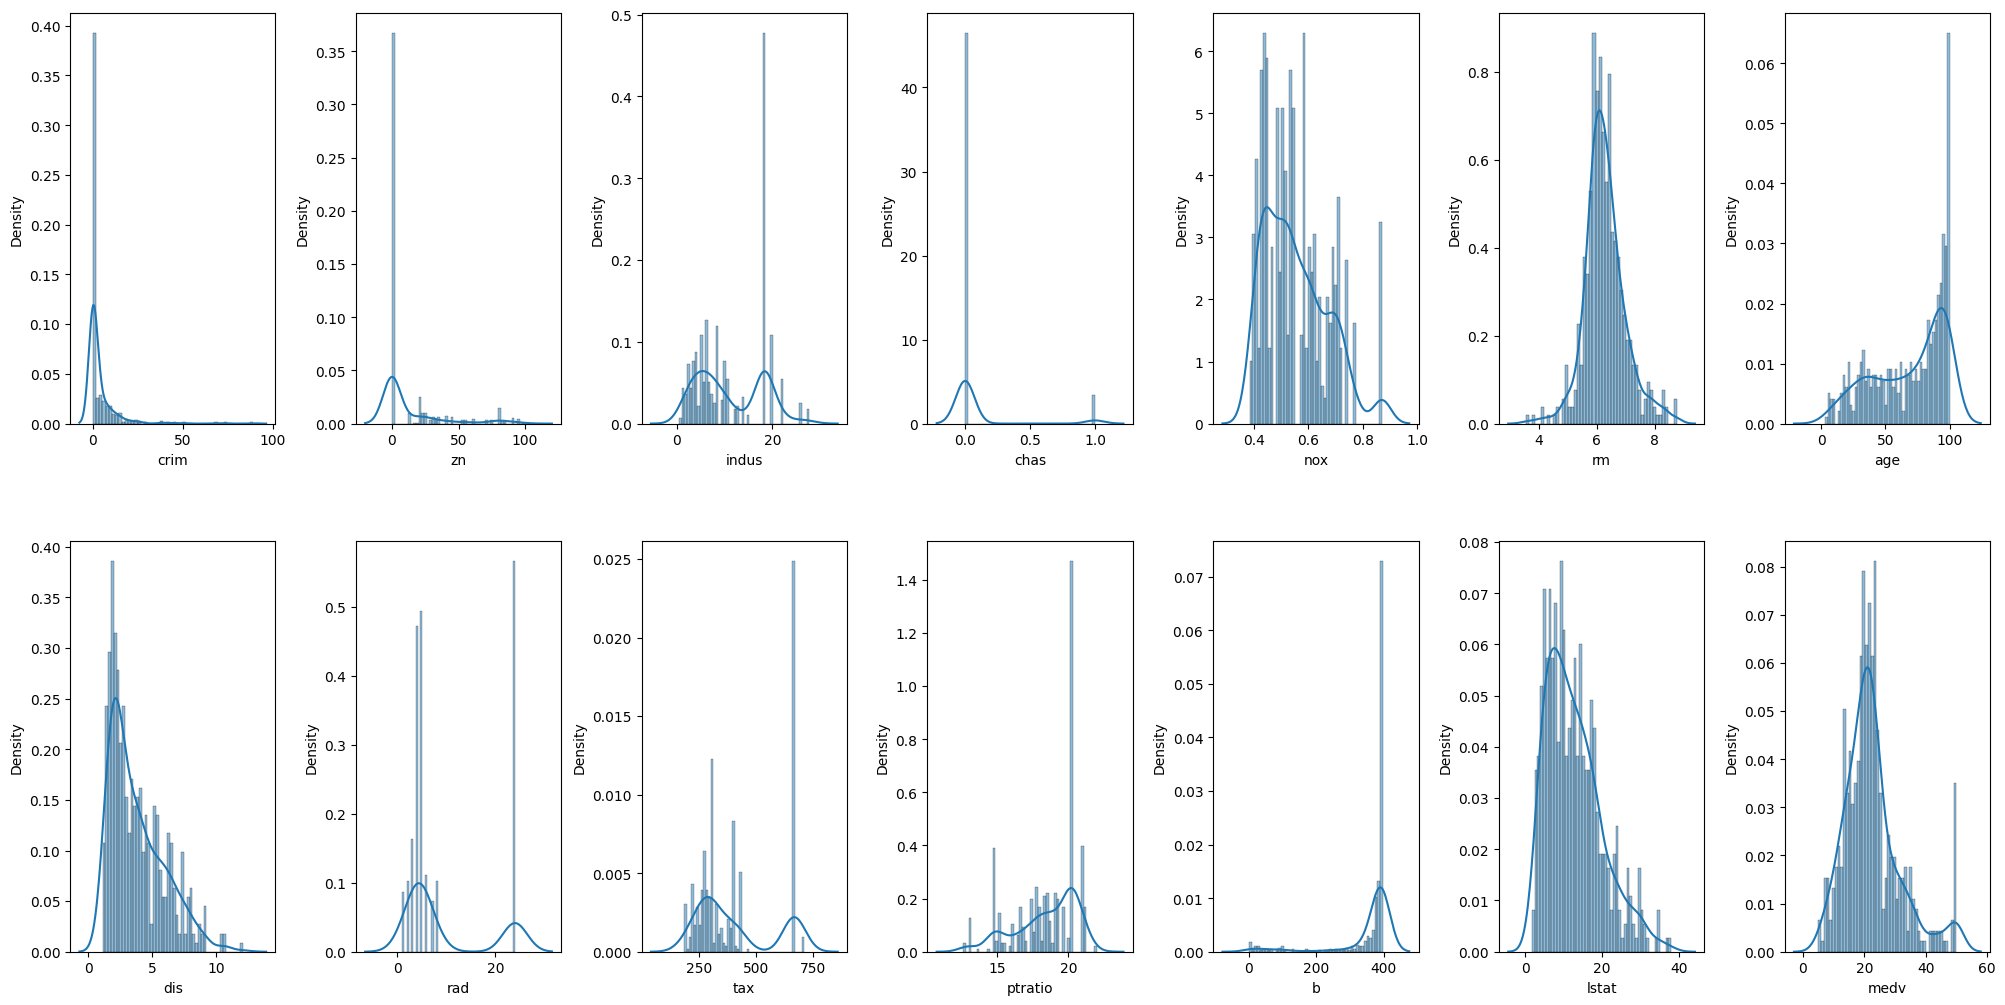

In [25]:
# Create hist plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in boston_data.items():
    sns.histplot(value, ax=ax[index], kde=True, bins=50, stat="density", kde_kws=dict(cut=3))
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Min-Max Normalixation

In [29]:
cols = ['crim', 'zn', 'tax', 'b']
for col in cols:
    # find min and max of the column
    minimum = min(boston_data[col])
    maximum = max(boston_data[col])
    boston_data[col] = (boston_data[col] - minimum) / (maximum-minimum)

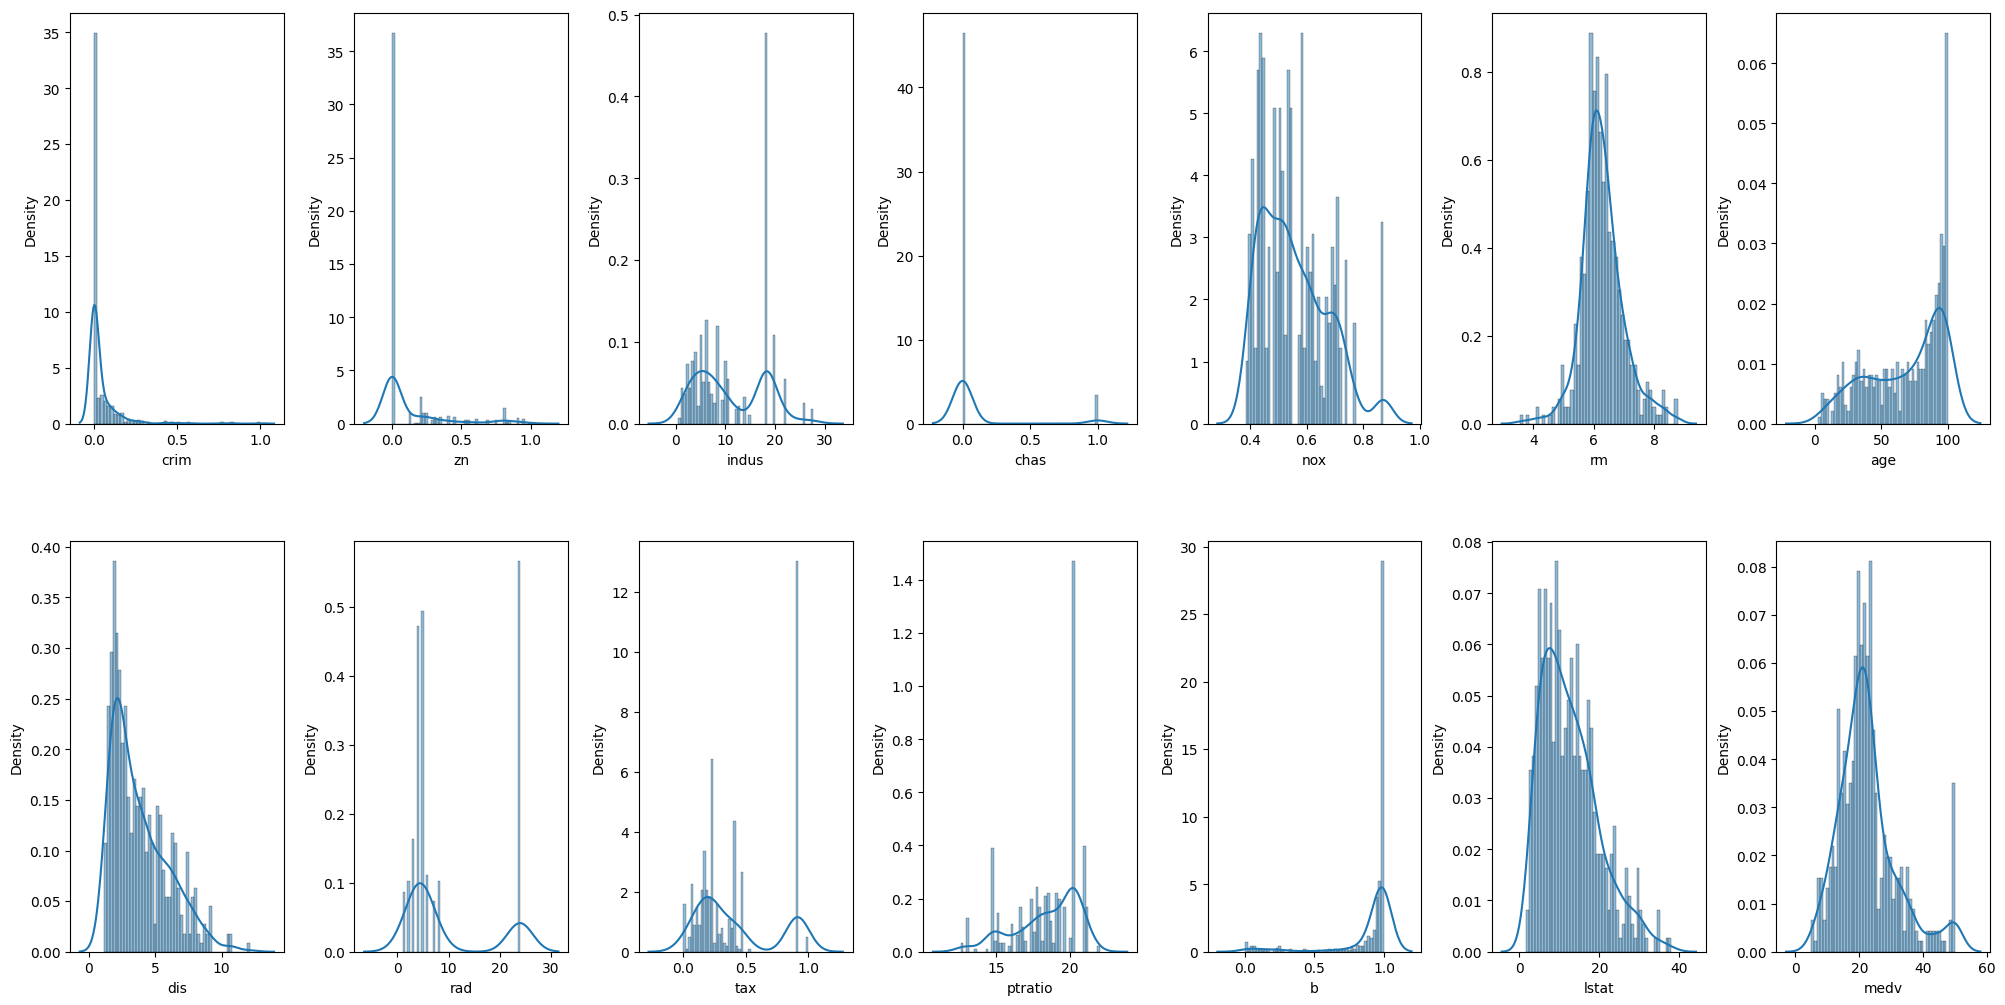

In [ ]:
# Create hist plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in boston_data.items():
    sns.histplot(value, ax=ax[index], kde=True, bins=50, stat="density", kde_kws=dict(cut=3))
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [31]:
# Standardization

from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(boston_data[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,b
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [32]:
for col in cols:
    boston_data[col] = scaled_cols[col]

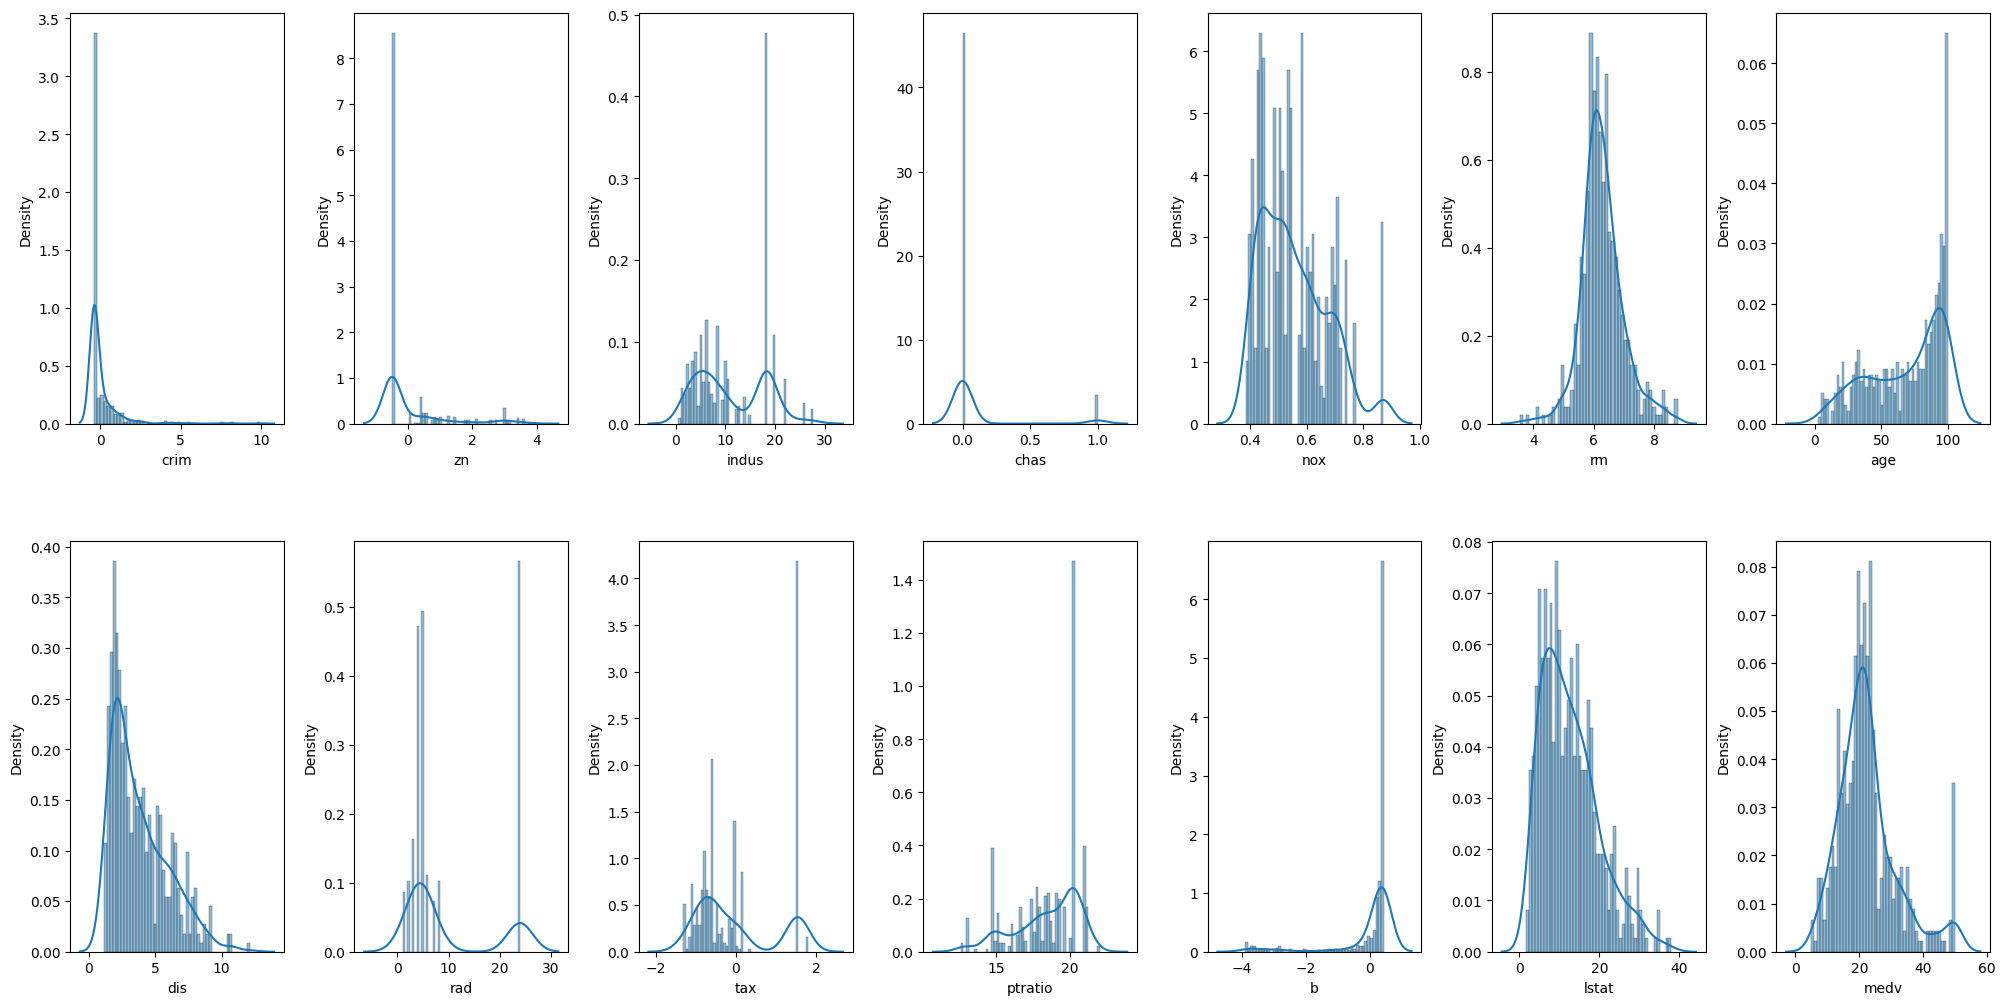

In [33]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in boston_data.items():
    sns.histplot(value, ax=ax[index], kde=True, bins=50, stat="density", kde_kws=dict(cut=3))
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Coorelation matrix

<Axes: >

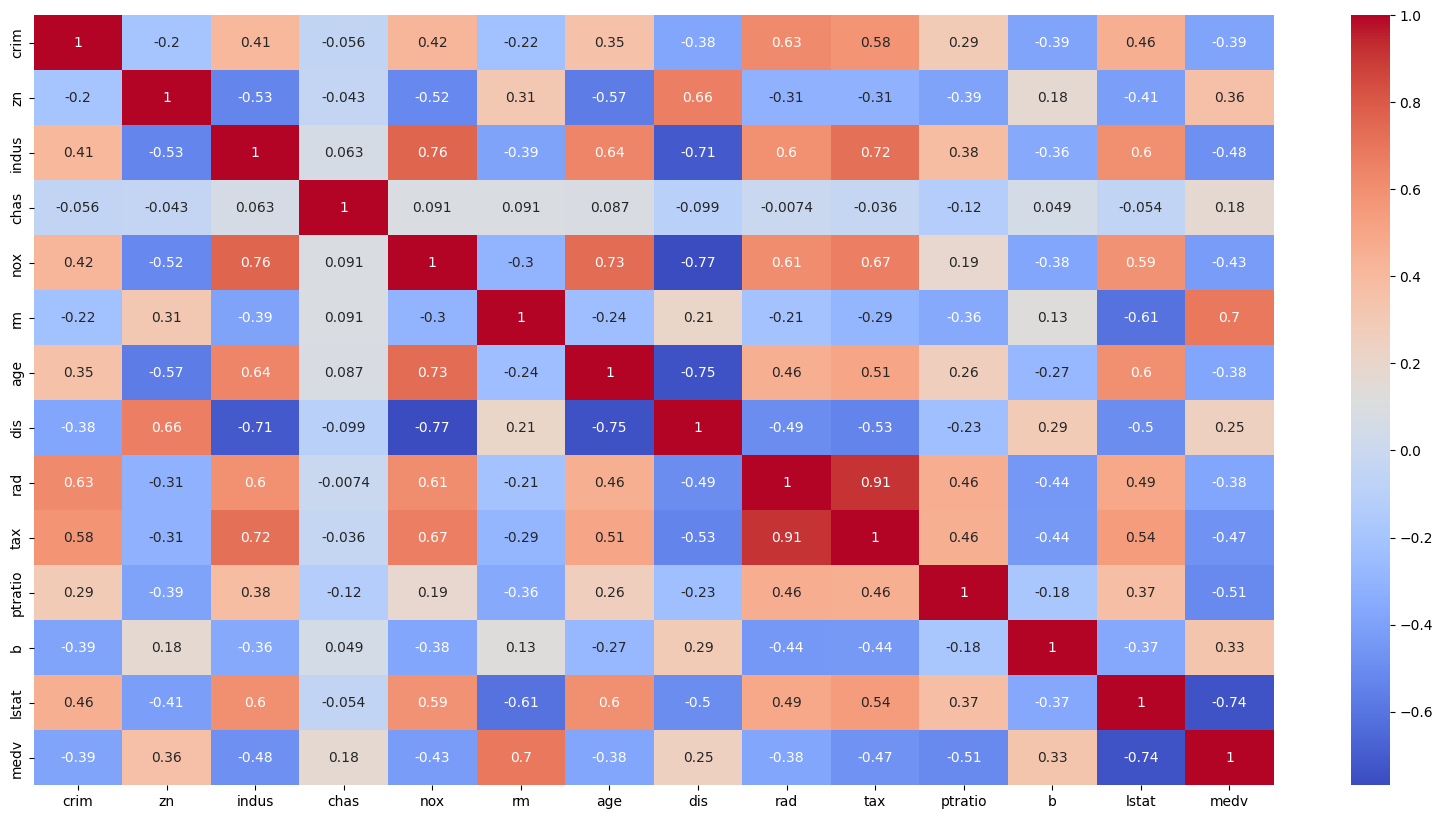

In [35]:
corr = boston_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True, cmap= 'coolwarm')

<Axes: xlabel='lstat', ylabel='medv'>

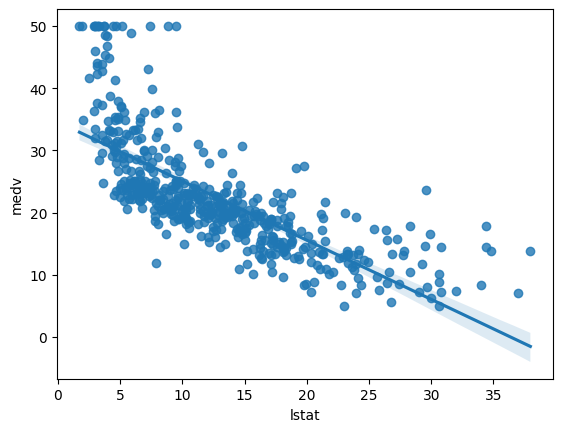

In [36]:
sns.regplot(y= boston_data['medv'], x= boston_data['lstat'])

<Axes: xlabel='rm', ylabel='medv'>

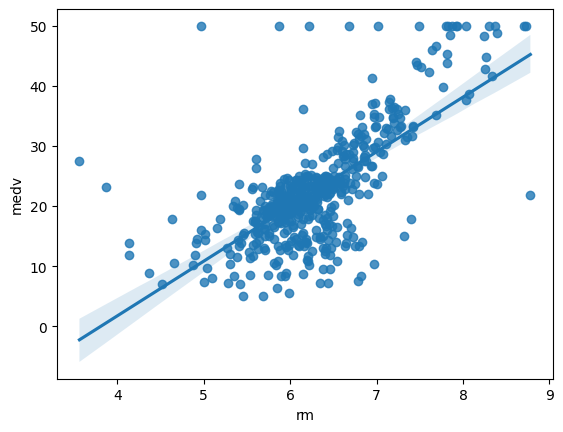

In [37]:
sns.regplot(y= boston_data['medv'], x= boston_data['rm'])

## Input Split

In [38]:
X = boston_data.drop(columns=['medv', 'rad'], axis=1)
y = boston_data['medv']

## Model Training

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(x_train,y_train)

    # predict the training set
    pred = model.predict(x_test)

    # perform Cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv= 5)
    cv_score = np.abs(np.mean(cv_score))

    print("Model Report")
    print("MSE", mean_squared_error(y_test, pred))
    print("CV Score:", cv_score)
    print("r2 score:", r2_score(y_test, pred))

Model Report
MSE 26.470945619590726
CV Score: 35.58136621076917
r2 score: 0.6390347738951403


<Axes: title={'center': 'Model Coeficients'}>

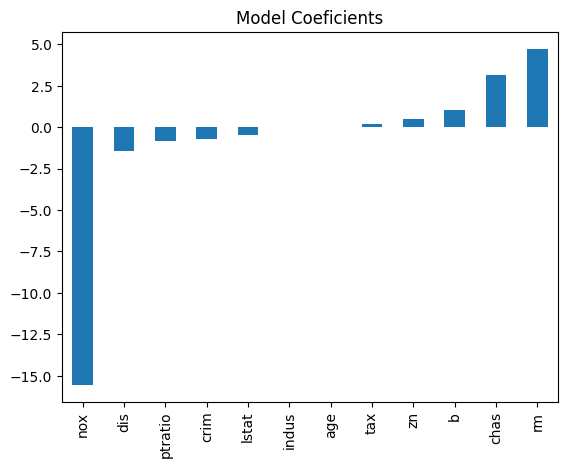

In [169]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
Linear_model = LinearRegression()
train(Linear_model, X, y)
coef = pd.Series(Linear_model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coeficients")

Model Report
MSE 26.469315903364585
CV Score: 33.807850739467604
r2 score: 0.6390569971619064


<Axes: title={'center': 'Model Coeficients'}>

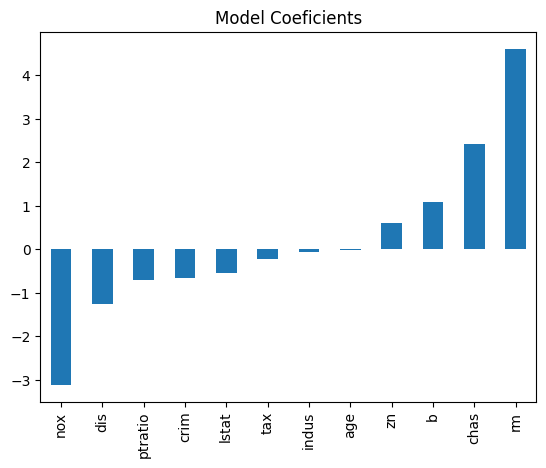

In [170]:
## Ridge Regression
ridge_model = Ridge(alpha=5)
train(ridge_model, X, y)
coef = pd.Series(ridge_model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coeficients")

Model Report
MSE 25.573674266146664
CV Score: 37.63520549719236
r2 score: 0.651270217298932


<Axes: title={'center': 'Model Coeficients'}>

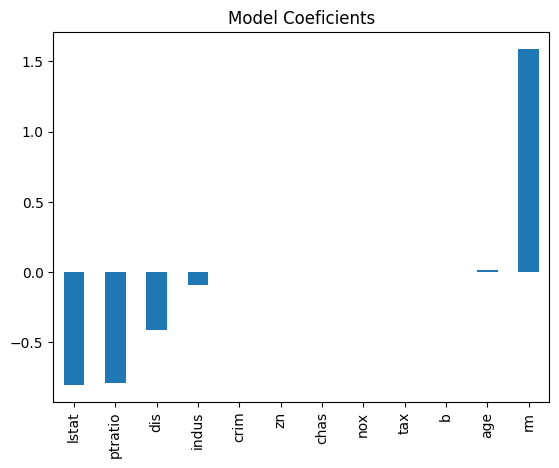

In [189]:
## Lasso Regression
Lasso_model = Lasso(alpha=1)
train(Lasso_model, X, y)
coef = pd.Series(Lasso_model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coeficients")